## Capitalisation EDA

In this notebook, we explore the capitalisation characteristics of the dataset titles in the Coleridge dataset. From a short observation of the data, one can already see that the first datasets have titles in which all the words start with a capital. In this notebook we explore more deeply what the characteristics are, as this information might be useful in designing the NLP model

### Data loading

Lets add the project folder and import the parse scripts:

In [42]:
import os, sys, inspect

current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

from utils import ParseUtils
import re
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
train_df = ParseUtils.get_train_df()

In [3]:
train_df.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study


Having loaded the data, we can define some functions that allow us to count three simple characteristics:
1. The total word count in the title
2. The amount of words that starts with a capital
3. The amount of words that is full caps

In [4]:
def count_words(title):
    """
    Counts the amount of words in the title
    """
    return len(title.split(" "))

def count_start_capital(title):
    """
    Counts the amount of words of which the first letter is uppercase
    """
    return sum(1 for word in title.split(" ") if word[0].isupper())

def count_full_capital(title):
    """
    Counts the amount of words that are full caps (e.g. COVID-19)
    """
    return sum(1 for word in title.split(" ") if re.sub("r([^A-z])+", "", word).isupper())

We apply these functions to the data:

In [5]:
train_df["count_words"] = train_df['dataset_title'].apply(count_words)
train_df["count_start_capital"] = train_df['dataset_title'].apply(count_start_capital)
train_df["count_full_capital"] = train_df['dataset_title'].apply(count_full_capital)

In [6]:
train_df.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label,count_words,count_start_capital,count_full_capital
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,4,4,0
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,4,4,0
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,4,4,0
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,4,4,0
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,4,4,0


In [104]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19661 entries, 0 to 19660
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         19661 non-null  object
 1   pub_title                  19661 non-null  object
 2   dataset_title              19661 non-null  object
 3   dataset_label              19661 non-null  object
 4   cleaned_label              19661 non-null  object
 5   count_words                19661 non-null  int64 
 6   count_start_capital        19661 non-null  int64 
 7   count_full_capital         19661 non-null  int64 
 8   text                       19661 non-null  object
 9   title_mention_count        19661 non-null  int64 
 10  title_mention_count_clean  19661 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.7+ MB


In [51]:
def count_statistics(data, title, whole_counts=True):
    if whole_counts:
        plt.hist(data, bins=np.arange(-0.5, max(data) + 0.5, 1))
        plt.xticks(range(0, max(data)))
    else:
        plt.hist(data)
    plt.title(title)
    print("--"+title+"--")
    print("Mean", np.mean(data))
    print("Median", np.median(data))
    print("Std", np.std(data))

--Words in title--
Mean 4.734499771120492
Median 5.0
Std 1.3286559856890183


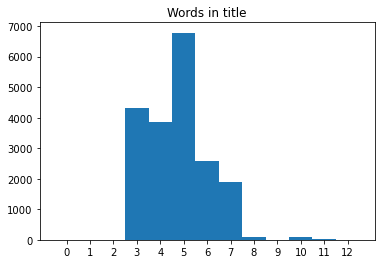

In [52]:
count_statistics(train_df["count_words"], "Words in title")

In [53]:
count_words_array = np.array(train_df["count_words"])

print("Fraction of titles between 3 and 7 words in length: "+str(len(count_words_array[3 <= count_words_array][count_words_array <= 7])/len(train_df["count_words"])))

Fraction of titles between 3 and 7 words in length: 0.98896292151976


--Words in title that start with a capital--
Mean 3.763440313310615
Median 4.0
Std 1.0118257298185773


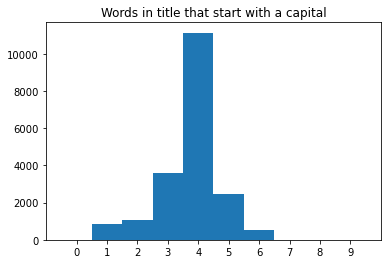

In [54]:
count_statistics(train_df["count_start_capital"], "Words in title that start with a capital")

--Fraction of words in title that start with a capital--
Mean 0.8045605823401968
Median 0.8
Std 0.15584347376388522


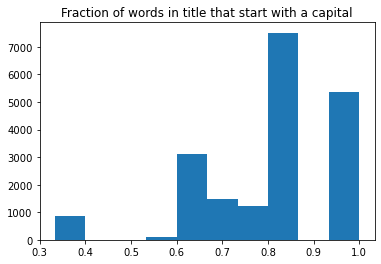

In [55]:
count_statistics(train_df["count_start_capital"] / train_df["count_words"], "Fraction of words in title that start with a capital", whole_counts=False)

--Words in tital that are full-caps--
Mean 0.48476679721275623
Median 0.0
Std 0.5215798643971711


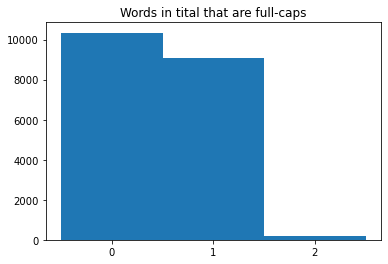

In [19]:
count_statistics(train_df["count_full_capital"], "Words in tital that are full-caps")

--Fraction of words in title that are full-caps--
Mean 0.09570916385040794
Median 0.0
Std 0.10560524550003372


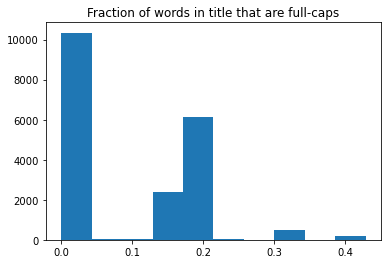

In [56]:
count_statistics(train_df["count_full_capital"] / train_df["count_words"], "Fraction of words in title that are full-caps", whole_counts=False)

## Observations

We find the following:
1. The title length of the datasets is centered around 5 words, with a standard deviation of 1.32. 98.9% of all titles have a length between 3 and 7 words
2. The amount of words in the title that have a leading capital is centered around 4, with a standard deviation of 1.01. We find that on average, 80% (or 4 out of 5) of the words in the title have a leading capital letter.
3. About half of the titles contain a full-caps word.

Thus, we find that a lot of titles contain capitalized words, both leading capitals and full-caps words.

If we want to leverage this data, we need to make sure that the text provided in the data actually respects this capitalisation. Lets check this:

In [57]:
train_df['text'] = train_df['Id'].apply(ParseUtils.read_append_return)

In [58]:
train_df.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label,count_words,count_start_capital,count_full_capital,text
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,4,4,0,This study used data from the National Educati...
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,4,4,0,Dropping out of high school is not necessarily...
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,4,4,0,", stress satisfactory outcomes for all youth,..."
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,4,4,0,Federal Reserve Bank of Richmond S1. Accountin...
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,4,4,0,This article investigates an important factor ...


Now we just Ctrl-F the title and see if it is contained one-on-one in the text:

In [67]:
def mention_count(dataset):
    return dataset['text'].count(dataset['dataset_title'])

train_df["title_mention_count"] = train_df.apply(lambda data: data['text'].count(data['dataset_title']), axis=1)

In [101]:
sort_list = list(train_df["title_mention_count"])
sort_list.sort()
print("Top 30 highest counts:")
sort_list[::-1][:30]

Top 30 highest counts:


[300,
 275,
 57,
 57,
 54,
 52,
 52,
 52,
 48,
 47,
 45,
 44,
 43,
 43,
 39,
 39,
 38,
 37,
 35,
 33,
 33,
 32,
 30,
 30,
 30,
 29,
 29,
 28,
 28,
 28]

--Title mention amount in text--
Mean 1.198460047932283
Median 1.0
Std 1.5195359557618133


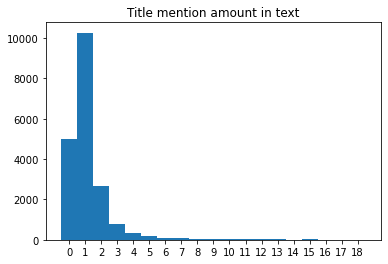

In [102]:
count_statistics(train_df["title_mention_count"][train_df["title_mention_count"] < 20], "Title mention amount in text")

In [90]:
train_df["title_mention_count_clean"] = train_df.apply(lambda data: data['text'].count(data['cleaned_label']), axis=1)

--Cleaned label mention count in text--
Mean 0.2185622645351797
Median 0.0
Std 0.8726784466414802


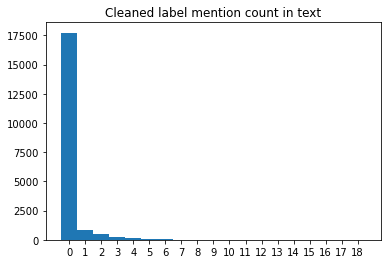

In [103]:
count_statistics(train_df["title_mention_count_clean"][train_df["title_mention_count_clean"] < 20], "Cleaned label mention count in text")

## Observations

We note the following
1. **Quite some texts contain a lot of mentions (top 30 ranges from 300-30 mentions), even though the distribution is much more skewed towards 0-1-2.**
2. **We find that roughly 1 out of 4 texts do not mention the dataset title one-on-one. Is this a problem with the count code, or do they simply not correspond?**
3. Cleaned labels seem to generally not occur in text, so likely, the text was not cleaned in the same way (or in a way that breaks the capitalisation).